# Machine Learning Exercise

Name: MUTESASIRA EDWARD

RegNo: 2023/HD07/3369U

In [2]:
# import necessary libraries
import pandas as pd
from pandas import read_csv
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the data: diabetes dataset provided in the repo
file_name = "assignment_data.csv"
data_frame = pd.read_csv(file_name)
data_frame.head(5)

,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
0,0.0,0.0,1.0,22.0,NaN,0.0,0.0,1.0,11.0,1.0,...,1.0,139.0,4.080910,4.8,1.0,NaN,10.0,1.432357e+06,1.0,0
1,0.0,1.0,1.0,NaN,35.282291,1.0,1.0,1.0,NaN,1.0,...,1.0,135.0,3.220714,NaN,1.0,NaN,10.0,NaN,0.0,1
2,1.0,0.0,0.0,101.0,NaN,1.0,0.0,0.0,NaN,0.0,...,1.0,134.0,5.261970,NaN,1.0,NaN,16.0,NaN,1.0,1
3,NaN,1.0,0.0,NaN,NaN,1.0,1.0,NaN,14.0,1.0,...,1.0,124.0,3.560370,3.0,1.0,NaN,16.0,NaN,0.0,1
4,NaN,1.0,1.0,49.0,NaN,0.0,0.0,NaN,NaN,1.0,...,1.0,128.0,4.394712,3.8,1.0,NaN,36.0,6.667831e+05,1.0,1


In [4]:
# Check the data types
data_frame.dtypes

age                float64
sex                float64
on_art             float64
days_art           float64
temp               float64
gcs                float64
weight             float64
fever              float64
dur_fever          float64
headache           float64
dur_headache       float64
vischange          float64
dur_vischange      float64
vomit              float64
dur_vomit          float64
cd4                float64
wbc                float64
hemoglobin         float64
platelets          float64
sodium             float64
potassium          float64
csf_lactate        float64
csf_glucose_mg     float64
csf_lymph          float64
csf_amt_removed    float64
viralload          float64
artnaive           float64
Label                int64
dtype: object

In [5]:
print(data_frame.describe)

<bound method NDFrame.describe of       age  sex  on_art  days_art       temp  gcs  weight  fever  dur_fever  \
0     0.0  0.0     1.0      22.0        NaN  0.0     0.0    1.0       11.0   
1     0.0  1.0     1.0       NaN  35.282291  1.0     1.0    1.0        NaN   
2     1.0  0.0     0.0     101.0        NaN  1.0     0.0    0.0        NaN   
3     NaN  1.0     0.0       NaN        NaN  1.0     1.0    NaN       14.0   
4     NaN  1.0     1.0      49.0        NaN  0.0     0.0    NaN        NaN   
...   ...  ...     ...       ...        ...  ...     ...    ...        ...   
2495  0.0  0.0     1.0    1533.0        NaN  1.0     1.0    1.0       90.0   
2496  NaN  0.0     1.0    1140.0  36.045808  1.0     1.0    NaN        NaN   
2497  1.0  0.0     0.0     224.0        NaN  1.0     1.0    NaN        2.0   
2498  NaN  0.0     0.0     141.0        NaN  1.0     0.0    NaN       13.0   
2499  0.0  0.0     0.0     775.0        NaN  0.0     1.0    NaN        NaN   

      headache  ...  platelet

In [6]:
# check the dimensions of the data, and explain why this step is important
data_frame.shape

(2500, 28)

#### Explanating why checking the dimensions of data is important
ITs because of the following reseons

1. `Data Integrity:` This ensures that the data is complete and accurate. 
    The shape of the data gives an idea of how much data is available for analysis. 
    It helps in detecting any inconsistencies or missing values in the data.

2. `Data Preprocessing:` The dimensions of data determine the appropriate preprocessing steps 
    to apply before building a machine learning model. Steps like data cleaning.

3. `Model Training:` Since machine learning models require a certain amount of data to learn 
    and generalize patterns in the data, checking the dimensions impacts this stage.
    If the dataset is too small, the model may not learn the underlying patterns in the data, 
    and if the dataset is too large, it may lead to overfitting. 
    
4. `Training time estimation:` The dimensions of data have a significant impact 
    on the training times of machine learning models. 
    As the size of the dataset increases, the training time of machine learning models also increases.

In [6]:
#transform the dataset by filling in values that are min = 0 but are not accurate e.g Insulin min=0
#chose the best way you think to replace those values, whether with the mean value e.t.c

In [45]:
# create a copy of the original dataset with a new name
transformed_data = data_frame.copy()
# Drop duplicates and fill NaN values with zero
transformed_data.drop_duplicates(transformed_data)
transformed_data = transformed_data.fillna(0)

# replace the 0 values with the mean of non-zero values in the temp column
temp_mean = transformed_data[transformed_data["temp"] != 0]["temp"].mean()
transformed_data["temp"] = transformed_data["temp"].replace(0, temp_mean)

# replace the 0 values with the mean of non-zero values in the dur_fever column
dfever_mean = transformed_data[transformed_data["dur_fever"] != 0]["dur_fever"].mean()
transformed_data["dur_fever"] = transformed_data["dur_fever"].replace(0, dfever_mean)

# replace the 0 values with the mean of non-zero values in the dur_headache column
dheadeche_mean = transformed_data[transformed_data["dur_headache"] != 0]["dur_headache"].mean()
transformed_data["dur_headache"] = transformed_data["dur_headache"].replace(0, dheadeche_mean)

# replace the 0 values with the mean of non-zero values in the csf_lymph column
lymph_mean = transformed_data[transformed_data["csf_lymph"] != 0]["csf_lymph"].mean()
transformed_data["csf_lymph"] = transformed_data["csf_lymph"].replace(0, lymph_mean)

# replace the 0 values with the mean of non-zero values in the potassium column
potassium_mean = transformed_data[transformed_data["potassium"] != 0]["potassium"].mean()
transformed_data["potassium"] = transformed_data["potassium"].replace(0, potassium_mean)

# replace the 0 values with 1 in the csf_glucose_mg column
transformed_data["csf_glucose_mg"] = transformed_data["csf_glucose_mg"].replace(0, 1)

# replace the 0 values with 1 in the csf_lactate column
transformed_data["csf_lactate"] = transformed_data["csf_lactate"].replace(0, 1)

# replace the 0 values with the mean of non-zero values in the viralload column
viralload_mean = transformed_data[transformed_data["viralload"] != 0]["viralload"].mean()
transformed_data["viralload"] = transformed_data["viralload"].replace(0, viralload_mean)

transformed_data.head(5)

,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
0,0.0,0.0,1.0,22.0,36.786191,0.0,0.0,1.0,11.000000,1.0,...,1.0,139.0,4.080910,4.8,1.0,75.184532,10.0,1.432357e+06,1.0,0
1,0.0,1.0,1.0,0.0,35.282291,1.0,1.0,1.0,26.432129,1.0,...,1.0,135.0,3.220714,1.0,1.0,75.184532,10.0,3.545953e+05,0.0,1
2,1.0,0.0,0.0,101.0,36.786191,1.0,0.0,0.0,26.432129,0.0,...,1.0,134.0,5.261970,1.0,1.0,75.184532,16.0,3.545953e+05,1.0,1
3,0.0,1.0,0.0,0.0,36.786191,1.0,1.0,0.0,14.000000,1.0,...,1.0,124.0,3.560370,3.0,1.0,75.184532,16.0,3.545953e+05,0.0,1
4,0.0,1.0,1.0,49.0,36.786191,0.0,0.0,0.0,26.432129,1.0,...,1.0,128.0,4.394712,3.8,1.0,75.184532,36.0,6.667831e+05,1.0,1


In [8]:
print(transformed_data.describe())

               age          sex       on_art     days_art         temp  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.197600     0.524000     0.431600   466.630000    36.786191   
std       0.398268     0.499524     0.495398   838.328478     0.830212   
min       0.000000     0.000000     0.000000     0.000000    34.108662   
25%       0.000000     0.000000     0.000000     0.000000    36.786191   
50%       0.000000     1.000000     0.000000    10.000000    36.786191   
75%       0.000000     1.000000     1.000000   577.000000    36.786191   
max       1.000000     1.000000     1.000000  4199.000000    39.497840   

               gcs       weight        fever    dur_fever     headache  ...  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  ...   
mean      0.712000     0.616000     0.358000    26.432129     0.902800  ...   
std       0.452922     0.486455     0.479508    17.823795     0.296289  ...   
min       0.00000

In [ ]:
#install missingno
%pip install missingno

<Axes: >

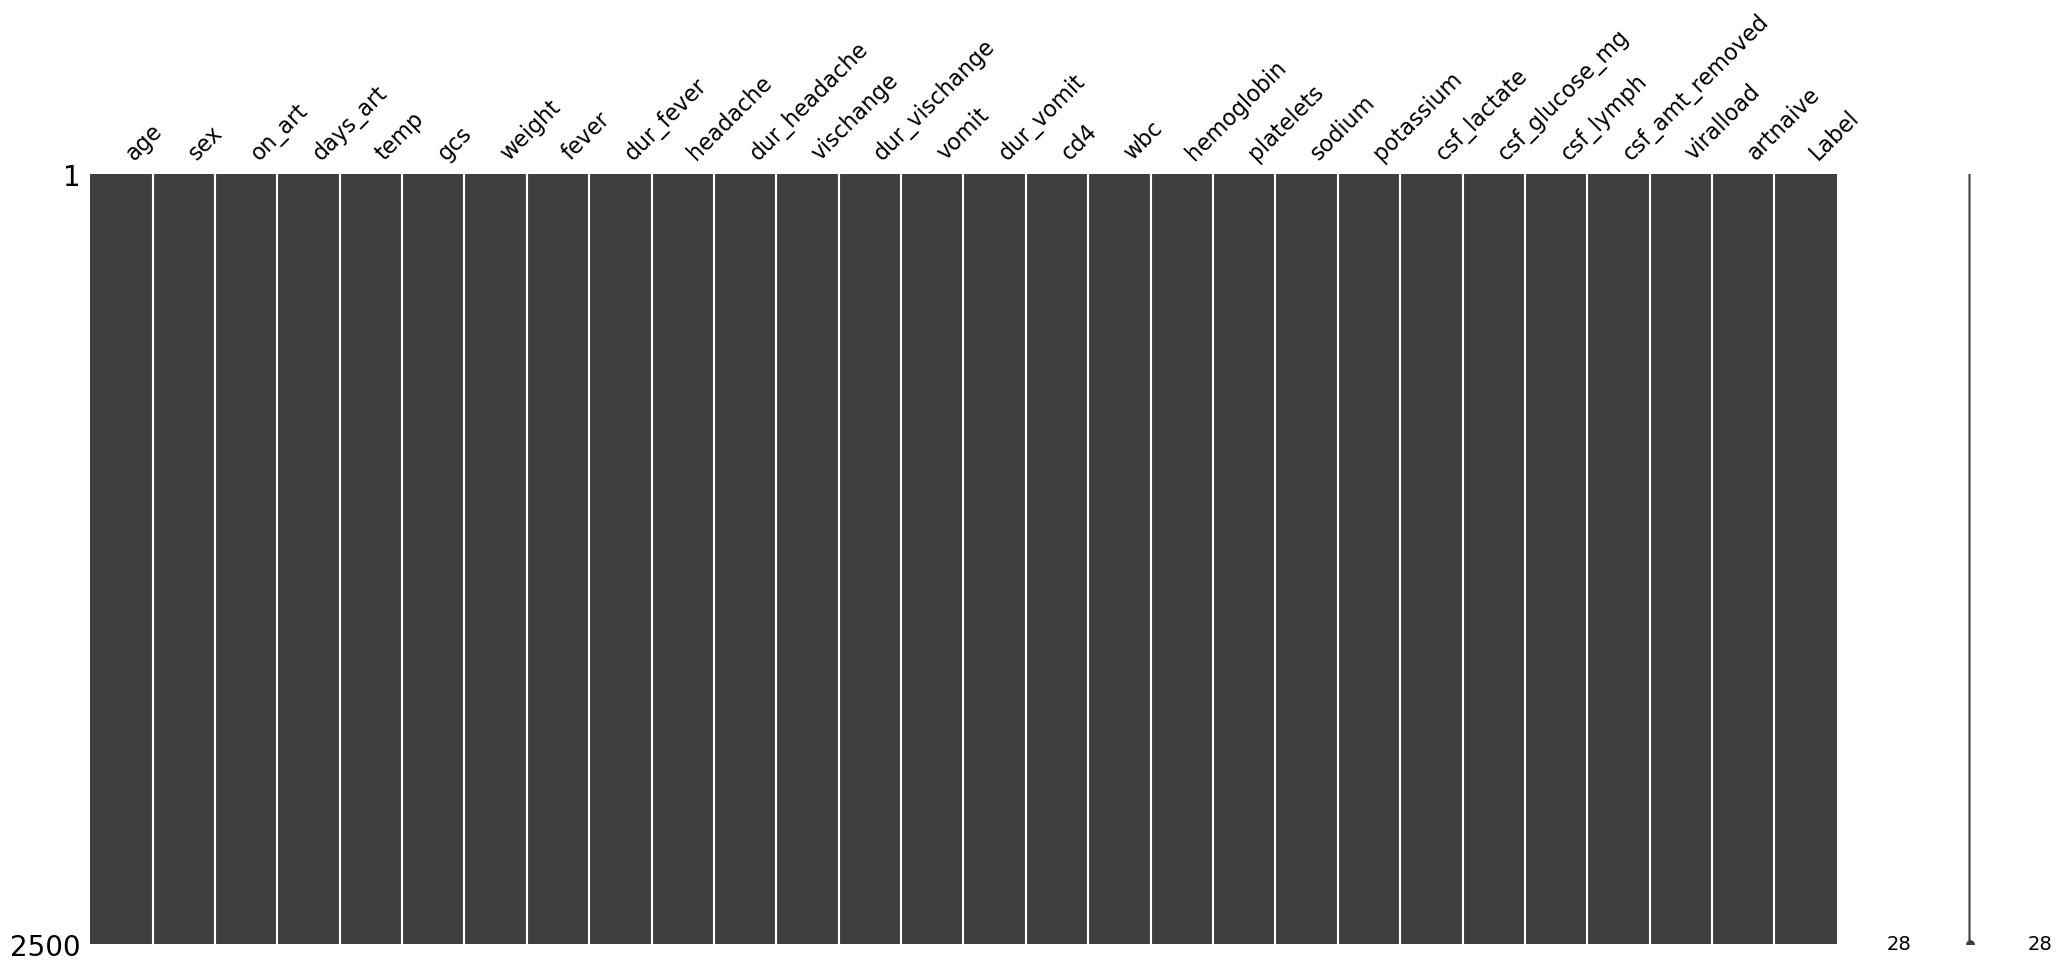

In [46]:
# plot the missingness matrix with missingno
import missingno as msno
# ploting missingness matrix with missingno
msno.matrix(transformed_data)

In [ ]:
#install pandas profiling
%pip install ydata-profiling

In [47]:
# export an html report for your profiling

from ydata_profiling import profile_report
# create an EDA report using pandas profiling
profile = transformed_data.profile_report()
profile.to_file(output_file="assignment_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#install seaborn and plot at least 2-3 variables of your choice

#after plotting explain what the plot is communicating.

In [ ]:
# Install Seaborb
%pip install seaborn

<Axes: xlabel='dur_vomit', ylabel='dur_headache'>

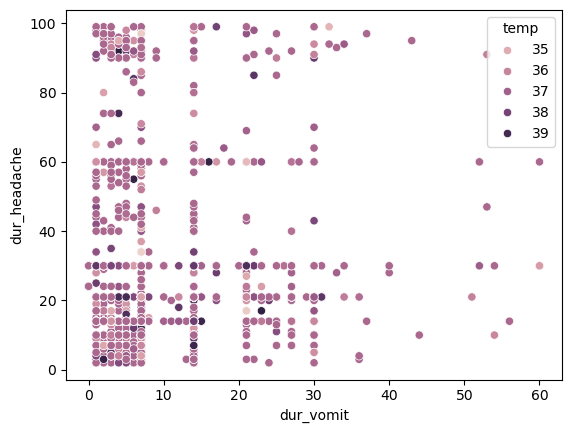

In [11]:
# Import Seaborn
import seaborn as sns
# import matplotlib.pyplot as plt
sns.scatterplot(transformed_data, x="dur_vomit", y="dur_headache", hue="temp")

The graph shows that the duration of headache is high in the first days of vomiting with high temperature.
And as the duration of vomiting increases, both headache and temperature reduces.

<Axes: xlabel='temp', ylabel='dur_fever'>

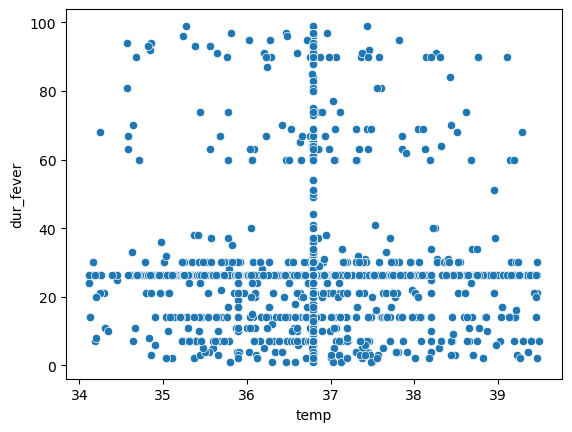

In [12]:
sns.scatterplot(transformed_data, x="temp", y="dur_fever")

The scatterplot of duration of fever against temperature has no correlation. 

#Further exercises

Model spot checking,
- I would like for you to choose up to 20 diferent models for classification in the sklearn library and add them in the code below
- The idea is to evaluate as many as possible, you can add even more of those.
- run them through the code below and then find the ones that might work well with your data.

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    VotingClassifier,  # New import for adding more models
)
from sklearn.neural_network import MLPClassifier  # New import for adding more models
from sklearn.ensemble import RandomForestRegressor  # New import for adding more models
from sklearn.ensemble import (
    GradientBoostingRegressor,
)  # New import for adding more models
from sklearn.linear_model import RidgeClassifier  # New import for adding more models
from sklearn.linear_model import SGDClassifier  # New import for adding more models

from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
)

dataframe = transformed_data

# Split the dataset
X = dataframe.iloc[:, 0:27]
Y = dataframe.iloc[:, 27]

# Prepare models
models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC(probability=True)),  # Enable probability for SVC to calculate MCC
    ("RF", RandomForestClassifier()),
    ("GB", GradientBoostingClassifier()),
    ("ADA", AdaBoostClassifier()),
    ("BC", BaggingClassifier()),
    ("ETC", ExtraTreesClassifier()),
    ("MLP", MLPClassifier()),
    ("RFR", RandomForestRegressor()),  # Regression model
    ("GBR", GradientBoostingRegressor()),  # Regression model
    ("RC", RidgeClassifier()),  # Classification model
    ("SGD", SGDClassifier()),  # Classification model
]

# Scoring metrics
scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    "MCC": make_scorer(matthews_corrcoef),
}

# Evaluate models function
def evaluate_models(models, X, Y, scoring, n_splits=10, random_seed=7):
    scores = []
    for name, model in models:
        kfold = KFold(n_splits=n_splits, random_state=random_seed, shuffle=True)
        cv_results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
        scores.append(
            {
                "Model": name,
                "F1 Score": np.mean(cv_results["test_f1"]),
                "Recall": np.mean(cv_results["test_recall"]),
                "Precision": np.mean(cv_results["test_precision"]),
                "MCC": np.mean(cv_results["test_MCC"]),
            }
        )
    return pd.DataFrame(scores)


# Evaluation
model_scores = evaluate_models(models, X, Y, scoring)

# Display the consolidated scores
print(model_scores)

   Model  F1 Score    Recall  Precision       MCC
0     LR  0.912912  0.999065   0.840623  0.005901
1    LDA  0.909103  0.986659   0.843050  0.051547
2    KNN  0.898637  0.969596   0.837627 -0.045195
3   CART  0.838862  0.828270   0.850486  0.058642
4     NB  0.907422  0.988127   0.839140 -0.026778
5    SVM  0.913179  1.000000   0.840400  0.000000
6     RF  0.912609  0.998053   0.840784  0.011648
7     GB  0.907406  0.983319   0.842548  0.047217
8    ADA  0.904638  0.974304   0.844492  0.058548
9     BC  0.889483  0.932858   0.850273  0.096192
10   ETC  0.908992  0.990406   0.840071 -0.013858
11   MLP  0.906338  0.984355   0.840008 -0.010552
12   RFR       NaN       NaN        NaN       NaN
13   GBR       NaN       NaN        NaN       NaN
14    RC  0.912950  0.999541   0.840349 -0.002428
15   SGD  0.912121  0.996682   0.840988  0.014856


In [ ]:
#chose your best model and train the model based on the example in the code
#For this cell let the parameters in your first model be on default

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the AdaBoost Classifier with default parameters
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.838


In [ ]:
#update the parameters as you see fit and record your results
#you can run as many examples as possible.

In [85]:
# Define parameter configurations to try AdaBoostClassifier with adjusted parameters
parameters = [
    {
        "n_estimators": 50,
        "learning_rate": 0.1,
        "random_state": 42,
    },  # Default parameters
    {
        "n_estimators": 100,
        "learning_rate": 0.5,
        "random_state": 42,
    },  # Increased n_estimators and learning_rate
    {
        "n_estimators": 200,
        "learning_rate": 0.1,
        "random_state": 42,
    },  # Increased n_estimators
    {
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    },  # Increased learning_rate
]

# Train and evaluate the model for each parameter configuration
for i, param_config in enumerate(parameters):
    # Initialize the AdaBoost Classifier model with current parameters
    model = AdaBoostClassifier(**param_config)

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Record the accuracy for the current configuration
    results[f"Configuration {i+1}"] = accuracy

# Display the recorded results
for config, accuracy in results.items():
    print(f"{config}: Accuracy - {accuracy}")

Configuration 1: Accuracy - 0.86
Configuration 2: Accuracy - 0.848
Configuration 3: Accuracy - 0.858
Configuration 4: Accuracy - 0.838


In [ ]:
#Try another model of your choice and repeate the same steps as above.

In [104]:
# Initialize the logistic regression model with defaults
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_regression_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}")

Accuracy: 0.858


In [103]:
# Define parameter configurations to try
param_configs = [
    {
        "C": 0.1,  # Stronger regularization
        "penalty": "l2",
        "solver": "liblinear",
        "max_iter": 1000,
        "tol": 1e-4,
        "class_weight": None,
        "multi_class": "auto",
    },
    {
        "C": 1.0,  # Default regularization
        "penalty": "l2",
        "solver": "liblinear",
        "max_iter": 1000,
        "tol": 1e-4,
        "class_weight": None,
        "multi_class": "auto",
    },
    {
        "C": 10.0,  # Weaker regularization
        "penalty": "l2",
        "solver": "liblinear",
        "max_iter": 1000,
        "tol": 1e-4,
        "class_weight": None,
        "multi_class": "auto",
    },
    {
        "C": 1.0,  # Custom configuration with solver 'lbfgs'
        "penalty": "l2",
        "solver": "lbfgs",
        "max_iter": 1000,
        "tol": 1e-4,
        "class_weight": None,
        "multi_class": "auto",
    },
]

# Initialize a list to store evaluation results
results = []

# Iterate through each configuration
for i, config in enumerate(param_configs):
    # Initialize the logistic regression model with the current configuration
    logistic_regression_model = LogisticRegression(**config, random_state=42)

    # Train the model on the training data
    logistic_regression_model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = logistic_regression_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    mcc = matthews_corrcoef(Y_test, Y_pred)

    # Store the results for the current configuration
    results.append(
        {
            "Configuration": f"Config {i + 1}",
            "C": config["C"],
            "Solver": config["solver"],
            "Accuracy": accuracy,
            "F1 Score": f1,
            "Precision": precision,
            "Recall": recall,
            "MCC": mcc,
        }
    )

# Iterate through each configuration
for i, config in enumerate(param_configs):
    # Initialize the logistic regression model with the current configuration
    logistic_regression_model = LogisticRegression(**config, random_state=42)

    # Train the model on the training data
    logistic_regression_model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = logistic_regression_model.predict(X_test)

    # Evaluate the model's performance (accuracy)
    accuracy = accuracy_score(Y_test, Y_pred)

    # Print the configuration number and accuracy
    print(f"Configuration {i + 1}: Accuracy - {accuracy:.4f}")

Configuration 1: Accuracy - 0.8600
Configuration 2: Accuracy - 0.8600
Configuration 3: Accuracy - 0.8600
Configuration 4: Accuracy - 0.8580


In [86]:
# Initialize the K-Nearest Neighbors (KNN) classifier with default parameters
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.838


In [87]:
# Define parameter configurations to try KNeighborsClassifier with adjusted parameters
parameters = [
    {
        "n_neighbors": 3,  # Default n_neighbors
        "weights": "uniform",  # Default weights
    },
    {
        "n_neighbors": 5,
        "weights": "uniform",
    },
    {
        "n_neighbors": 7,
        "weights": "distance",  # Use distance weighting
    },
    {
        "n_neighbors": 9,
        "weights": "uniform",
    },
]

# Train and evaluate the model for each parameter configuration
for i, param_config in enumerate(parameters):
    # Initialize the KNeighborsClassifier model with current parameters
    model = KNeighborsClassifier(**param_config)

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Record the accuracy for the current configuration
    results[f"Configuration {i+1}"] = accuracy

# Display the recorded results
for config, accuracy in results.items():
    print(f"{config}: Accuracy - {accuracy}")

Configuration 1: Accuracy - 0.812
Configuration 2: Accuracy - 0.838
Configuration 3: Accuracy - 0.842
Configuration 4: Accuracy - 0.852


Report:
- Write your discoveries in detail and what you have learnt below.
- Be as detailed as possible, this is very important.

Different machine learning models exhibit varying performance depending on the dataset. 

Performance metrics such as accuracy, F1 score, precision, recall, and Matthews correlation coefficient provide a comprehensive view of how well a model performs.

Tuning parameters can significantly impact the model's performance. Like for Linear Regression tuning parameters like C (regularization strength), solver (optimization algorithm), and penalty (regularization type) significantly impacts the model's performance.

Cross-validation and train-test splitting are essential techniques to evaluate the generalizability of the model and avoid overfitting to the training data.

In [5]:
#apply two transformations to the data

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Define the pipeline with two transformations: StandardScaler and PCA
# and then KNeighborsClassifier as the estimator
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Standardizes the features
        ("pca", PCA(n_components=2)),  # Reduces the dimensionality using PCA
        ("knn", KNeighborsClassifier(n_neighbors=3)),  # K-Nearest Neighbors classifier
    ]
)

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.808


In [6]:
#run model spot checkking again

In [116]:
from sklearn.model_selection import cross_val_score

# Initialize the AdaBoostClassifier with default parameters
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", cv_scores.mean())

Accuracy: 0.838
Cross-validation Accuracy: 0.8324


In [7]:
#which model was the best?

In [107]:
# Define models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
]

# Define evaluation metrics
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
}

# Evaluate models using cross-validation
results = []
for name, model in models:
    cv_results = cross_validate(model, X, Y, cv=5, scoring=scoring)
    avg_results = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
    results.append((name, avg_results))

# Display results
for name, result in results:
    print(f"Model: {name}")
    for metric, value in result.items():
        print(f"{metric.capitalize()}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.8400000000000001
Precision: 0.8406092184368739
Recall: 0.9990487501413867
F1: 0.9130056299380233

Model: K-Nearest Neighbors
Accuracy: 0.8144
Precision: 0.8383474829984954
Recall: 0.965252799457075
F1: 0.8972898607251066

Model: AdaBoost Classifier
Accuracy: 0.8324
Precision: 0.8466642265208664
Recall: 0.9776303585567245
F1: 0.9074401123192285



Report:
- Write your discoveries in detail and what you have learnt below.
- Be as detailed as possible, this is very important.

From the 3 models selected, Linear regression was found to be the best with high Accuracy, preceicision, recall and F1 scores. No single model or configuration is universally the best. It is essential to understand the strengths and limitations of each model and adjust parameters to suit the specific dataset and task.